# Data Visualization JakRespons

The Special Capital Region of Jakarta is the capital city and the largest city in Indonesia. Jakarta is the only city in Indonesia that has provincial-level status. The current population density of DKI Jakarta has reached 16,704 people per square kilometer. However, the high population density in Jakarta has a negative impact on social and environmental problems. Jakichan team visualize the dataset reports from the Jakarta residents that submitted through the Jakarta Kini (JAKI) application.

## 1. Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Check Out The Dataset

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
#dataset is a parameter to get the data from gdrive
dataset = pd.read_excel('/gdrive/MyDrive/Capstone Project/JAKI-dataset.xlsx')
dataset.head()

,no,source_name,id_category,category_name,label,id_skpd,skpd_name,nama_kota,kelurahan,deskripsi,created_date,created_at,completed_at,latitude,longitude,address,status_laporan,gambar_input_pelapor,gambar_TL_petugas_SKPD
0,1,JAKI,196,Jalan,Lain-lain,2768,SUDIN BINA MARGA KOTA JAKARTA TIMUR,Jakarta Timur,KELURAHAN CIBUBUR,"Jalan berlubang membahayakan, di tanjakan Ruma...",2019-11-06 15:53:57,2019-11-06 15:53:57,2019-11-07 18:02:32,-6.345417,106.872231,"JL. Pasar Jaya Cibubur, Blok A L01 Aks No. 118...",complete,https://s3-jaki.jakarta.go.id/jaki/report/medi...,http://s3.smartcity.jakarta.go.id/crm/public/1...
1,2,JAKI,252,Parkir liar,Parkir Liar Area Publik,3799,SUDIN PERHUBUNGAN JAKARTA TIMUR,Jakarta Timur,KELURAHAN CIBUBUR,parkir liar. lokasi di jl. abdulrahman ( tikun...,2019-11-12 07:59:42,2019-11-12 07:59:42,2019-11-13 09:01:49,-6.365138,106.884524,"GPdi Bulak sereh, Jl. Abdulrahman No.32, RT.2/...",complete,https://s3-jaki.jakarta.go.id/jaki/report/medi...,http://s3.smartcity.jakarta.go.id/crm/public/8...
2,3,JAKI,206,Jaringan listrik,Lain-lain,2774,SUDIN PERINDUSTRIAN DAN ENERGI KOTA JAKARTA TIMUR,Jakarta Timur,KELURAHAN CIBUBUR,lampu penerangan jalan mati lokasi di jl cempa...,2019-11-15 20:52:24,2019-11-15 20:52:24,2019-11-16 14:05:33,-6.353630,106.876641,"Jl. Cempaka Blok 34 No.1, RT.4/RW.4, Cibubur, ...",complete,https://s3-jaki.jakarta.go.id/jaki/report/medi...,http://s3.smartcity.jakarta.go.id/crm/public/7...
3,4,JAKI,208,Fasilitas Sosial/Fasilitas Umum,Lain-lain,3824,SUDIN PERTAMANAN DAN HUTAN KOTA JAKARTA TIMUR,Jakarta Timur,KELURAHAN KELAPA DUA WETAN,Fasilitas mainan anak. perosotan rusak berbula...,2019-11-23 06:25:58,2019-11-23 06:25:58,2019-11-25 12:19:04,-6.341058,106.882990,"Jl. Persahabatan IV No.56, RT.10/RW.8, Klp. Du...",complete,https://s3-jaki.jakarta.go.id/jaki/report/medi...,http://s3.smartcity.jakarta.go.id/crm/public/1...
4,5,JAKI,282,Pohon,Pangkas > 70 cm,3824,SUDIN PERTAMANAN DAN HUTAN KOTA JAKARTA TIMUR,Jakarta Timur,KELURAHAN CILANGKAP,pohon dtepi jalan sudah terlalu rindang dan su...,2019-11-23 13:52:26,2019-11-23 13:52:26,2019-11-26 12:03:06,-6.341196,106.909432,"Jl. Raya Mabes TNI No.27, RT.5/RW.6, Cilangkap...",complete,https://s3-jaki.jakarta.go.id/jaki/report/medi...,http://s3.smartcity.jakarta.go.id/crm/public/0...


In [4]:
#Check how much data is blank in each column
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57708 entries, 0 to 57707
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   no                      57708 non-null  int64         
 1   source_name             57708 non-null  object        
 2   id_category             57708 non-null  int64         
 3   category_name           57708 non-null  object        
 4   label                   57708 non-null  object        
 5   id_skpd                 57708 non-null  object        
 6   skpd_name               57708 non-null  object        
 7   nama_kota               57708 non-null  object        
 8   kelurahan               57708 non-null  object        
 9   deskripsi               57708 non-null  object        
 10  created_date            57708 non-null  datetime64[ns]
 11  created_at              57708 non-null  datetime64[ns]
 12  completed_at            57708 non-null  object

##3. Exploratory Data Analysis(EDA)

In [4]:
df = pd.DataFrame(dataset)
pd.DataFrame(df.category_name.unique()).values

array([['Jalan'],
       ['Parkir liar'],
       ['Jaringan listrik'],
       ['Fasilitas Sosial/Fasilitas Umum'],
       ['Pohon'],
       ['Arus Lalu Lintas'],
       ['Pelayanan Perhubungan'],
       ['Sampah'],
       ['Reklame'],
       ['Coretan/Tempelan/Iklan/ Selebaran'],
       ['Trotoar'],
       ['Pekerja Penanganan Prasarana dan Sarana Umum Kelurahan'],
       ['Saluran air, kali/sungai'],
       ['Jaringan komunikasi'],
       ['Sumur resapan'],
       ['Gedung sekolah'],
       ['Pencemaran lingkungan'],
       ['Transportasi Publik'],
       ['Administrasi terkait penanggulangan kebakaran dan penyelamatan'],
       ['Jembatan Penyeberangan Orang (JPO) dan/atau halte'],
       ['Pelanggaran Perda/Pergub'],
       ['Taman'],
       ['Gangguan ketenteraman dan ketertiban'],
       ['Pajak bumi dan bangunan'],
       ['Penyakit masyarakat'],
       ['Tata ruang dan bangunan'],
       ['Iklan Rokok'],
       ['Kartu Jakarta Pintar'],
       ['Konflik sosial'],
       ['Bantua

In [10]:
kategori = df.category_name.value_counts()

In [11]:
print(kategori.nlargest(5))

Parkir liar    6763
Sampah         5378
Jalan          4195
Pohon          4015
Banjir         3226
Name: category_name, dtype: int64


Text(0.5, 1.0, 'Report Distribution Based on DKI Jakarta Report Category')

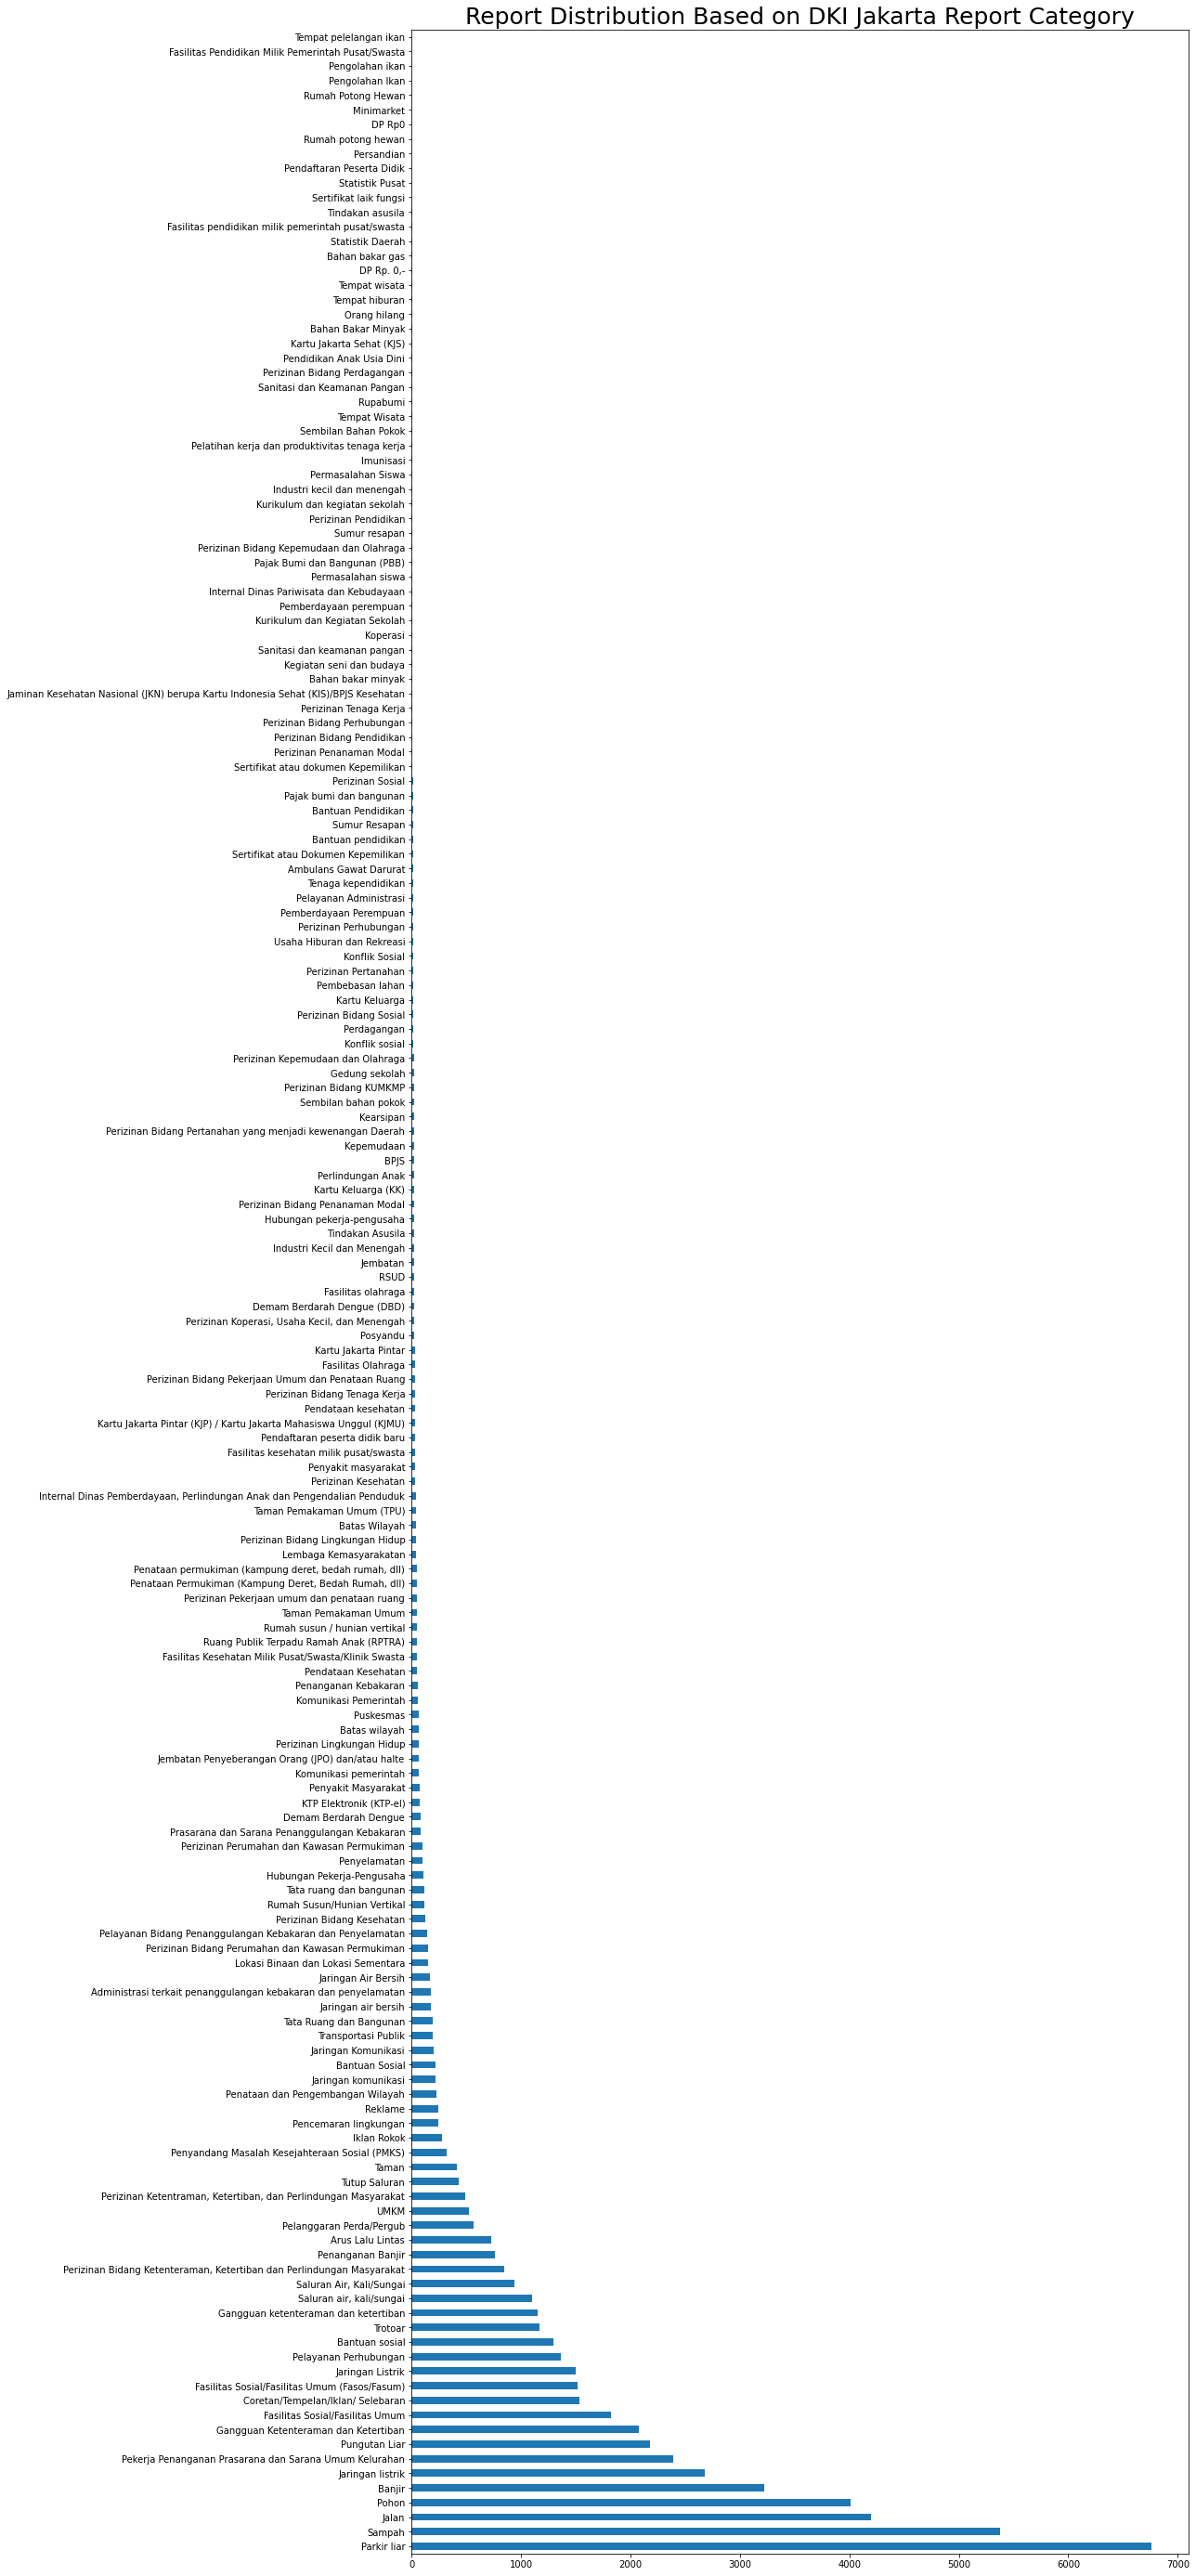

In [42]:
kategori.plot(kind="barh", figsize =(15, 50))
plt.title('Report Distribution Based on DKI Jakarta Report Category',fontsize = 25)

In [31]:
status = df.status_laporan.value_counts()
status

complete      53929
koordinasi     2926
wait            682
disposisi       171
Name: status_laporan, dtype: int64

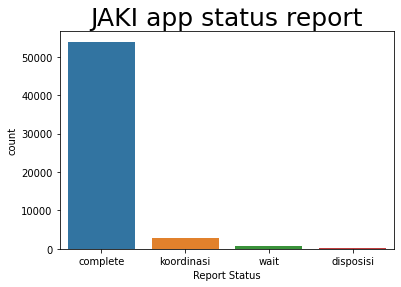

In [41]:
sns.countplot(
  x='status_laporan',
  data=df,
  order=df.status_laporan.value_counts().index
)
plt.xlabel("Report Status")
plt.title("JAKI app status report", fontsize = 25);

In [26]:
wilayah = df.nama_kota.value_counts().sort_values(ascending=True)
print(wilayah)

KEPULAUAN SERIBU       15
Jakarta Utara        7884
Jakarta Pusat        9919
Jakarta Selatan     12689
Jakarta Barat       13134
Jakarta Timur       14067
Name: nama_kota, dtype: int64


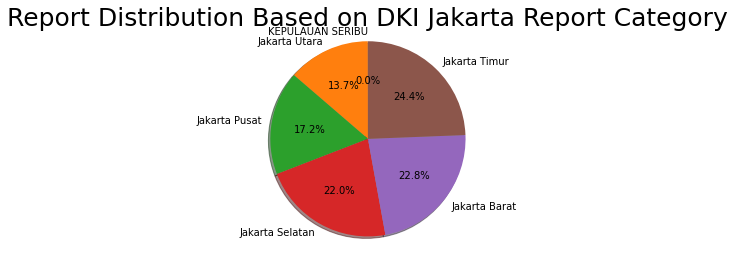

In [45]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'KEPULAUAN SERIBU', 'Jakarta Utara', 'Jakarta Pusat', 'Jakarta Selatan', 'Jakarta Barat', 'Jakarta Timur'
sizes = wilayah

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Report Distribution Based on DKI Jakarta Report Category',fontsize = 25)

plt.show()


# Sentiment Analysis Based on Urgency Level in JakRespons

## Introduction
Based on the dataset that we get from Jaki, the common report that Jakarta resident gives there is a problem with illegal parking, garbage, road, dense tree and flood. With the unstructured data in JakiRespon from the user, we try to create a model with sentiment analysis using TensorFlow based on the urgency level of the description report.

Analyzing the urgency level of the report giving benefit from the government, e.g :
* They can filter user report based on sentiments to identify things they have to do immediately about their problem.
* The operator can manage their online reputation easily by monitoring the sentiment of report residents write about their problem.

## 1. Text Preprocessing

In [18]:
import tensorflow as tf 
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

from google.colab import files

2.5.0


In [6]:
#df1 is a parameter to get the sample data from gdrive
df1 = pd.read_excel('/gdrive/MyDrive/Capstone Project/JakRespons-Sample.xlsx')
df1.head()

,kategori,deskripsi,sentiment
0,Fasilitas Sosial/Fasilitas Umum,lampu jalanan mati di Jl. Cemara II RT08/08 Du...,Not Urgent
1,Parkir liar,parkir liar bikin sempit jalan...\nbelakang po...,Not Urgent
2,Parkir liar,hallo admin mau lapor ada motor vespa modifika...,Not Urgent
3,Sampah,sampah karung batu puingnya tolong diangkut di...,Urgent
4,Banjir,"posisi di belakang Kelurahan Petamburan, Tepa...",Urgent


In [7]:
df1 = df1.drop(['kategori'], axis = 1)
df1

,deskripsi,sentiment
0,lampu jalanan mati di Jl. Cemara II RT08/08 Du...,Not Urgent
1,parkir liar bikin sempit jalan...\nbelakang po...,Not Urgent
2,hallo admin mau lapor ada motor vespa modifika...,Not Urgent
3,sampah karung batu puingnya tolong diangkut di...,Urgent
4,"posisi di belakang Kelurahan Petamburan, Tepa...",Urgent
...,...,...
595,kp. kurus gang masjid RT 009 RW 006. jalur kal...,Urgent
596,Apartemen Belmont Residences tdk ada saluran a...,Urgent
597,Batang pohon sudah mengenai kabel listrik.\nlo...,Urgent
598,parkir liar motor di atas trotoar,Not Urgent


In [8]:
urgent_report = df1[df1.sentiment == "Urgent"]
noturgent_report = df1[df1.sentiment == "Not Urgent"]

In [9]:
text1 = ",".join(map(str, urgent_report['deskripsi'] ))
text2 = ",".join(map(str, noturgent_report['deskripsi']))

text1_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text1)
text2_cloud = WordCloud(stopwords=STOPWORDS, background_color="white").generate(text2)

def show_word_cloud(cloud, title):
  plt.figure(figsize = (16, 10))
  plt.imshow(cloud, interpolation='bilinear')
  plt.title(title)
  plt.axis("off")
  plt.show();

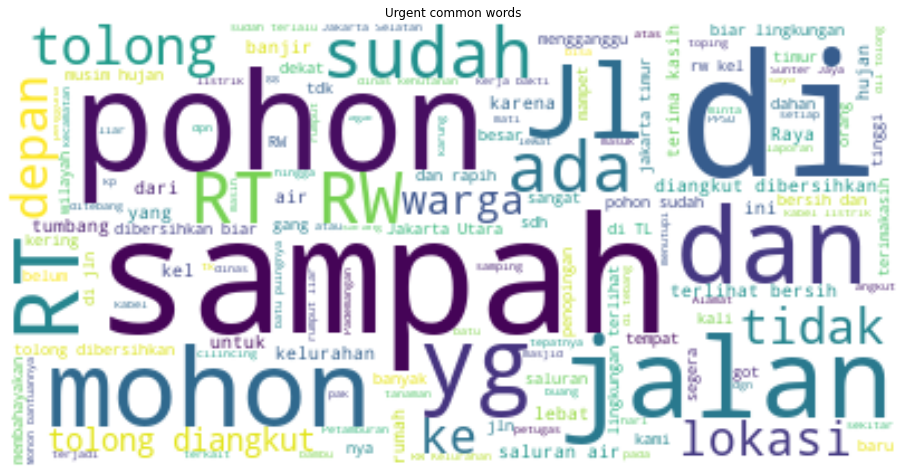

In [10]:
show_word_cloud(text1_cloud, "Urgent common words")

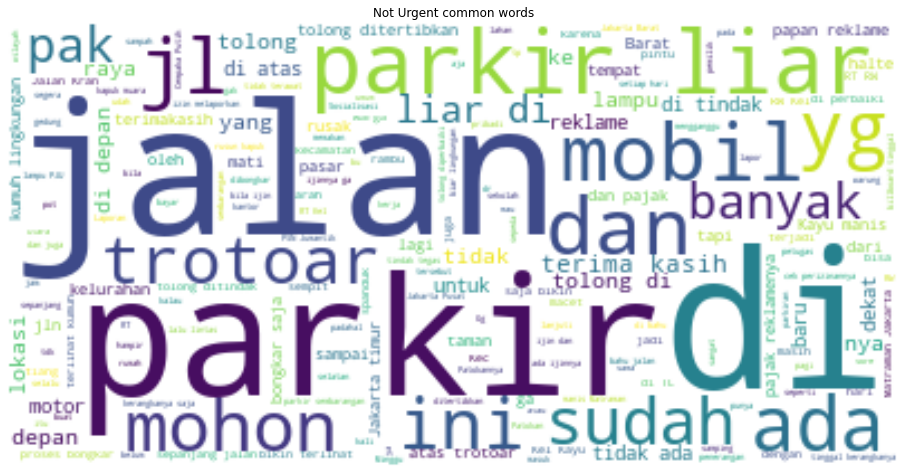

In [11]:
show_word_cloud(text2_cloud, "Not Urgent common words")

In [12]:
# convert sentiment label to numeric
sentiment_label = df1.sentiment.factorize()
# print it out, index 0 is Not Urgent and index 1 is Urgent sentiment respectively.
sentiment_label

(array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 

In [13]:
# Make a parameter of deskripsi coloum for tokenizing
report = df1.deskripsi.values

In [14]:
# Get initialize the tokenizer with a 3000 word unique limit. 
tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(report)
word_index = tokenizer.word_index

print(word_index)

{'<OOV>': 1, 'di': 2, 'jalan': 3, 'dan': 4, 'tolong': 5, 'parkir': 6, 'sampah': 7, 'pohon': 8, 'rt': 9, 'mohon': 10, 'ada': 11, 'rw': 12, 'tidak': 13, 'jl': 14, 'sudah': 15, 'liar': 16, 'jakarta': 17, 'yg': 18, 'depan': 19, 'ini': 20, 'kel': 21, 'mobil': 22, 'trotoar': 23, 'kasih': 24, 'lingkungan': 25, 'air': 26, 'terima': 27, 'lokasi': 28, 'dibersihkan': 29, 'untuk': 30, 'ke': 31, 'raya': 32, 'timur': 33, 'yang': 34, 'jln': 35, 'kelurahan': 36, 'saluran': 37, 'warga': 38, 'hujan': 39, 'banyak': 40, 'nya': 41, 'terlihat': 42, 'baru': 43, 'pak': 44, 'tindak': 45, 'saja': 46, 'barat': 47, 'diangkut': 48, 'dari': 49, 'utara': 50, 'lampu': 51, 'biar': 52, 'karena': 53, 'bikin': 54, '2': 55, 'sangat': 56, '04': 57, 'rumah': 58, 'hari': 59, 'reklame': 60, 'sepanjang': 61, 'kec': 62, 'mengganggu': 63, 'tl': 64, 'bersih': 65, '1': 66, 'dekat': 67, 'mati': 68, 'atas': 69, 'tempat': 70, 'no': 71, 'kayu': 72, 'kabel': 73, 'selatan': 74, 'listrik': 75, 'ga': 76, 'dinas': 77, 'ditertibkan': 78, 't

In [15]:
# The maximum length of text for training and testing data
encoded_report = tokenizer.texts_to_sequences(report)
padded_sequence = pad_sequences(encoded_report, maxlen=100)

print(report[0])
print(encoded_report[0])

lampu jalanan mati di Jl. Cemara II RT08/08 Duri Kosambi, Cengkareng, Jakarta Barat
[51, 200, 68, 2, 14, 514, 116, 515, 92, 301, 257, 158, 17, 47]


In [38]:
# Configuration model
vocab_size = len(tokenizer.word_index) + 1
embedding_vector_length = 32

# Build model
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=100) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  


print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 32)           70176     
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 100, 32)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                16600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 51        
Total params: 86,827
Trainable params: 86,827
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
history = model.fit(padded_sequence,sentiment_label[0],
                  validation_split=0.2, epochs=30, batch_size=32)

Epoch 1/30
15/15 [==============================] - 4s 109ms/step - loss: 0.6929 - accuracy: 0.4792 - val_loss: 0.6927 - val_accuracy: 0.4333
Epoch 2/30
15/15 [==============================] - 1s 90ms/step - loss: 0.6849 - accuracy: 0.5813 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 3/30
15/15 [==============================] - 1s 91ms/step - loss: 0.6633 - accuracy: 0.6167 - val_loss: 0.6495 - val_accuracy: 0.6500
Epoch 4/30
15/15 [==============================] - 1s 89ms/step - loss: 0.5796 - accuracy: 0.7875 - val_loss: 0.5672 - val_accuracy: 0.8167
Epoch 5/30
15/15 [==============================] - 1s 90ms/step - loss: 0.4335 - accuracy: 0.8375 - val_loss: 0.4263 - val_accuracy: 0.8250
Epoch 6/30
15/15 [==============================] - 1s 92ms/step - loss: 0.3363 - accuracy: 0.8792 - val_loss: 0.3870 - val_accuracy: 0.8667
Epoch 7/30
15/15 [==============================] - 1s 90ms/step - loss: 0.3330 - accuracy: 0.8625 - val_loss: 0.3701 - val_accuracy: 0.8250
Epoch 8/30
1

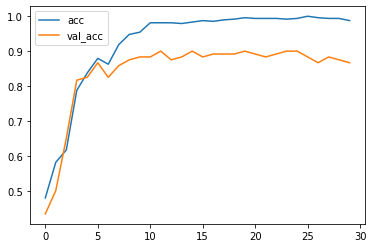

In [40]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

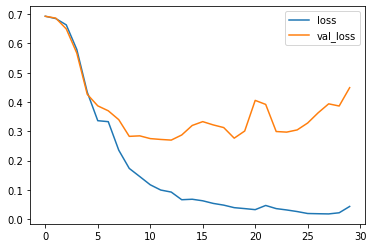

In [41]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## Predict Sentence

In [44]:
test_word = "Dipinggir jalan sampah menumpuk, dan bisa berakibat banjir" 
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw,maxlen=100)
tw

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   3,   7, 749,   4, 109,   1, 106]], dtype=int32)

In [45]:
prediction = int(model.predict(tw).round().item())
sentiment_label[1][prediction]

'Urgent'

## Save Model

In [46]:
save_model = "JakiChan"
tf.saved_model.save(model, save_model)
model.save("JakiChan.h5")

converter = tf.lite.TFLiteConverter.from_saved_model(save_model)
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_model = converter.convert()

tflite_model_file = 'JakiChan.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

files.download("JakiChan.tflite")


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.
INFO:tensorflow:Assets written to: JakiChan/assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>